***LOADING THE DATA SET AND PRE-PROCESSING THE DATA SET.***

In [ ]:
!pip install keras-tuner
!pip install kaggle

     |████████████████████████████████| 71kB 3.9MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=bb73a70e8b937ee3635cf0f8fb6bea6405c546eaab845c4dbd612f57fdc55508
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=c68f1ea71d82a08fa76daa10e783dcbe3496d622fa81176e992b16f77883ca6e
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
#for importing datasets directly from kaggle.
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
#changing permission
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d datamunge/sign-language-mnist

 78% 49.0M/62.6M [00:00<00:00, 44.7MB/s]
100% 62.6M/62.6M [00:00<00:00, 98.0MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "sign-language-mnist.zip"

#extracting the zip file.
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Extracted zip files succesfully.")

Extracted zip files succesfully.


In [ ]:
#checking any one of the csv files.
import pandas as pd
df = pd.read_csv("sign_mnist_test.csv")
df.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,...,145,123,78,162,239,227,229,226,226,225,224,222,89,91,94,111,136,154,167,184,125,3,166,225,195,188,172,185,161,122,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,...,85,80,84,151,238,255,255,250,237,245,250,232,103,101,102,103,95,208,231,227,209,190,179,182,152,150,159,119,83,63,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,...,93,52,24,53,63,33,41,51,48,45,49,55,149,150,150,148,147,151,124,82,84,81,69,81,111,103,84,75,53,28,26,40,64,48,29,46,49,46,46,53
5,21,72,79,87,101,115,124,131,135,139,142,144,147,150,153,156,159,160,162,164,165,166,166,167,167,168,168,168,167,73,80,89,104,117,126,132,136,140,143,146,...,108,186,189,190,193,193,194,194,195,195,195,195,89,106,116,127,136,145,151,163,159,154,152,144,129,100,78,64,115,186,187,189,192,193,194,194,194,195,195,194
6,10,93,100,112,118,123,127,131,133,136,139,140,143,144,145,146,149,151,153,154,155,156,159,159,160,160,161,163,164,93,102,113,119,123,128,131,134,138,140,141,...,109,172,174,175,176,178,180,180,181,181,181,182,118,122,128,133,137,141,157,168,176,182,175,174,165,135,107,82,137,174,173,175,177,178,180,180,181,181,181,183
7,14,177,177,177,177,177,178,179,179,178,179,179,178,179,178,179,179,179,179,178,178,179,178,177,178,177,177,179,143,180,180,180,180,180,180,181,182,183,182,183,...,92,118,225,225,223,223,222,220,220,220,219,219,221,222,209,205,234,235,224,199,167,137,113,100,94,98,100,100,94,198,232,223,224,224,223,221,221,221,220,219
8,3,191,194,196,198,201,203,204,205,205,205,205,206,206,205,204,200,217,218,143,185,202,198,197,195,193,192,190,189,193,197,198,200,203,204,206,208,208,208,208,...,104,67,42,68,77,50,58,66,64,61,64,70,156,156,156,155,154,157,133,95,96,94,83,94,121,114,97,89,68,45,43,57,78,64,47,62,65,62,62,68
9,7,171,172,172,173,173,173,173,173,172,172,172,171,170,170,169,168,168,166,165,165,164,164,152,86,72,61,65,85,174,174,174,175,175,175,175,175,175,174,174,...,201,201,199,198,197,196,195,192,192,170,165,177,173,160,143,127,115,100,85,155,212,207,208,207,207,205,203,202,201,201,199,199,198,196,195,194,183,85,65,124


In [ ]:
train = pd.read_csv('sign_mnist_train.csv')

In [ ]:
test = pd.read_csv('sign_mnist_test.csv')

In [ ]:
print(train.shape)
print(test.shape)

(27455, 785)
(7172, 785)


In [ ]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [ ]:
# Create training and testing arrays
train_set = np.array(train, dtype = 'float32')
test_set = np.array(test, dtype='float32')

In [ ]:
#Specifying class labels
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

(-0.5, 27.5, 27.5, -0.5)

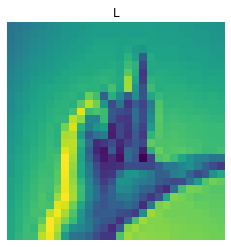

In [ ]:
#See a random image for class label verification
import random
import matplotlib.pyplot as plt
i = random.randint(1,27455)
plt.imshow(train_set[i,1:].reshape((28,28))) 
plt.imshow(train_set[i,1:].reshape((28,28))) 
label_index = train["label"][i]
plt.title(f"{class_names[label_index]}")
plt.axis('off')

In [ ]:
import pandas as pd
import numpy as np

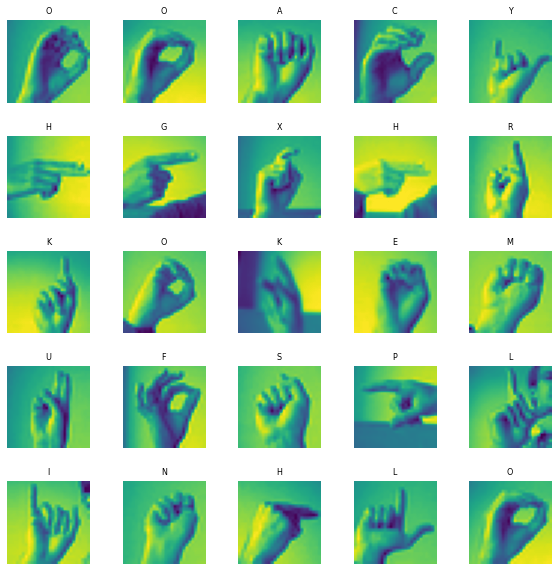

In [ ]:
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train_set) # get the length of the train dataset
# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 
    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( train_set[index,1:].reshape((28,28)) )
    label_index = int(train_set[index,0])
    axes[i].set_title(class_names[label_index], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [ ]:
# Prepare the training and testing dataset 
X_train = train_set[:, 1:] / 255
print(X_train)
y_train = train_set[:, 0]

X_test = test_set[:, 1:] / 255
y_test = test_set[:,0]

[[0.42 0.46 0.5  ... 0.8  0.8  0.79]
 [0.61 0.62 0.61 ... 0.4  0.53 0.58]
 [0.73 0.74 0.74 ... 0.76 0.76 0.76]
 ...
 [0.68 0.68 0.68 ... 0.79 0.78 0.78]
 [0.69 0.71 0.72 ... 0.25 0.34 0.36]
 [0.7  0.71 0.71 ... 0.8  0.82 0.84]]


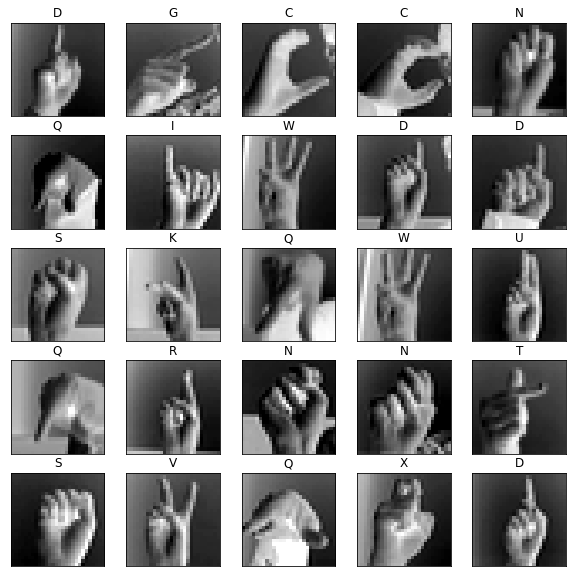

In [ ]:
#Visualize train images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)), cmap=plt.cm.binary)
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [ ]:
#Split the training and test sets
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(21964, 784)
(21964,)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)

(21964, 28, 28, 1)
(21964,)
(5491, 28, 28, 1)


In [ ]:
#Library for CNN Model
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

#Defining the Convolutional Neural Network
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(units = 25, activation = 'softmax'))

In [ ]:
#CNN Model Summary
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         7

In [ ]:
#Compiling
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

#Training the CNN model
history = cnn_model.fit(X_train, y_train, batch_size = 512, epochs =20 , verbose = 1, validation_data = (X_validate, y_validate))

Epoch 1/20
43/43 [==============================] - 21s 477ms/step - loss: 3.1908 - accuracy: 0.0489 - val_loss: 3.0433 - val_accuracy: 0.1253
Epoch 2/20
43/43 [==============================] - 20s 463ms/step - loss: 2.8585 - accuracy: 0.1314 - val_loss: 2.2545 - val_accuracy: 0.2859
Epoch 3/20
43/43 [==============================] - 20s 466ms/step - loss: 2.1736 - accuracy: 0.2896 - val_loss: 1.5279 - val_accuracy: 0.5409
Epoch 4/20
43/43 [==============================] - 20s 465ms/step - loss: 1.6081 - accuracy: 0.4581 - val_loss: 1.0545 - val_accuracy: 0.6873
Epoch 5/20
43/43 [==============================] - 20s 465ms/step - loss: 1.2382 - accuracy: 0.5769 - val_loss: 0.7649 - val_accuracy: 0.7585
Epoch 6/20
43/43 [==============================] - 20s 465ms/step - loss: 0.9730 - accuracy: 0.6617 - val_loss: 0.5598 - val_accuracy: 0.8374
Epoch 7/20
43/43 [==============================] - 20s 475ms/step - loss: 0.7680 - accuracy: 0.7275 - val_loss: 0.4234 - val_accuracy: 0.8809

Text(0.5, 1.0, 'Accuracy evolution')

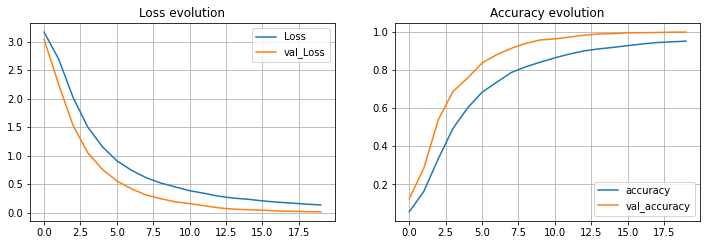

In [ ]:
#Visualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

In [ ]:
#Predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


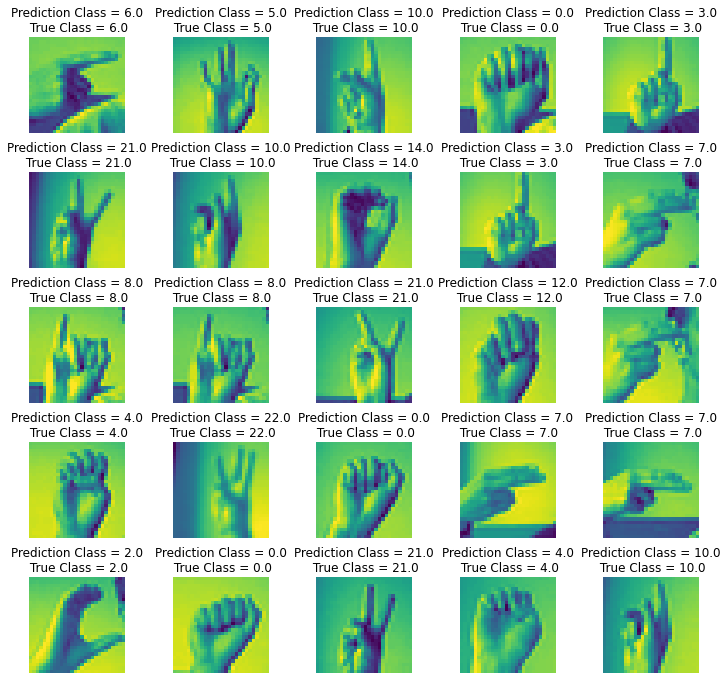

In [ ]:
#Visualize predictions
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n True Class = {y_test[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predicted_classes)

In [ ]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Computing confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

# Visualizing
    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

   # Rotating the tick labels and setting their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Looping over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
np.set_printoptions(precision=2)

In [ ]:
#Specifying class labels
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

Confusion matrix, without normalization


<Figure size 1440x1440 with 0 Axes>

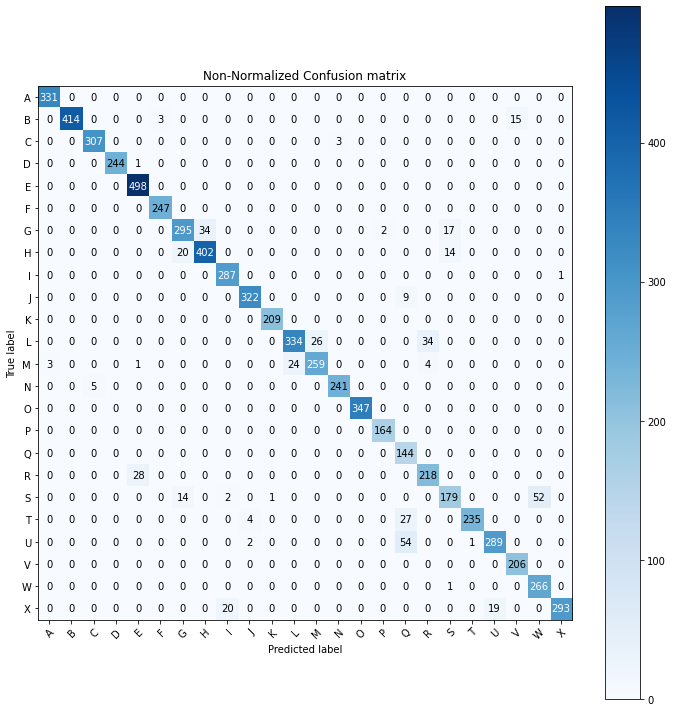

In [ ]:
#Non-Normalized Confusion Matrix
plt.figure(figsize=(20,20))
plot_confusion_matrix(y_test, predicted_classes, classes = class_names, title='Non-Normalized Confusion matrix')
plt.show()

Normalized confusion matrix


<Figure size 2520x2520 with 0 Axes>

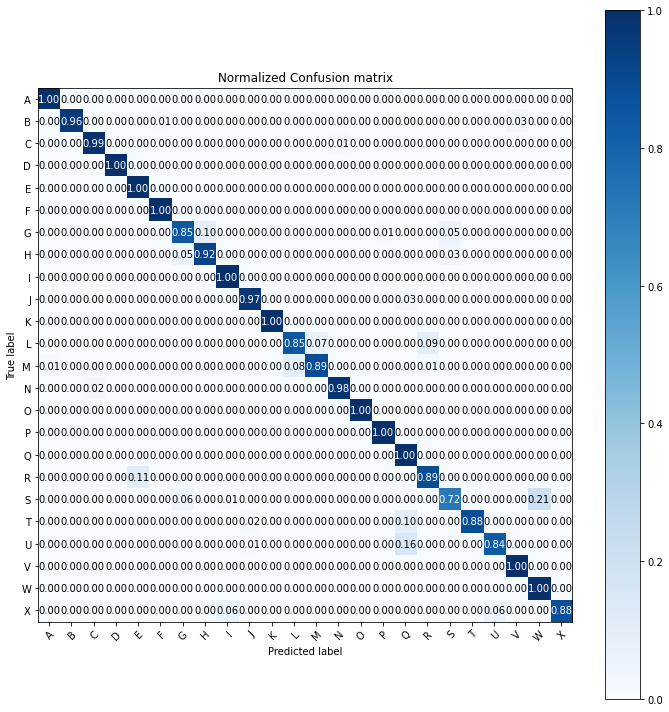

In [ ]:
#Normalized Confusion Matrix
plt.figure(figsize=(35,35))
plot_confusion_matrix(y_test, predicted_classes, classes = class_names, normalize=True, title='Normalized Confusion matrix')
plt.show()

In [ ]:
#Classification accuracy
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, predicted_classes)
print('Accuracy Score = ',acc_score)

Accuracy Score =  0.9385108756274401


In [ ]:
cnn_model.save("signlanguage")

INFO:tensorflow:Assets written to: signlanguage/assets


In [ ]:
import cv2
import tensorflow as tf
CATEGORIES=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

In [ ]:
def prepare(filepath):
  IMG_SIZE=28
  img_array=cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
  new_array=cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
  
  return new_array.reshape(-1,IMG_SIZE,IMG_SIZE,1)
  

In [ ]:
model=tf.keras.models.load_model("signlanguage",compile = True)



In [ ]:

prediction=model.predict_classes([prepare('/content/y.png')])

print(CATEGORIES[int(prediction)])

Y


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
